## IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk

## IMPORTING THE DATA

In [2]:
def importData(path: str) -> pd.DataFrame:
    return pd.read_csv(path)

faces = importData('../preprocessing/data/facesDataClean.csv')

## DEFINING THE STYLE OF THE PLOTS

In [3]:
plt.style.use("cyberpunk")

## VISUALISING THE AGE DISTRIBUTION OF THE PEOPLE IN THE PHOTOS

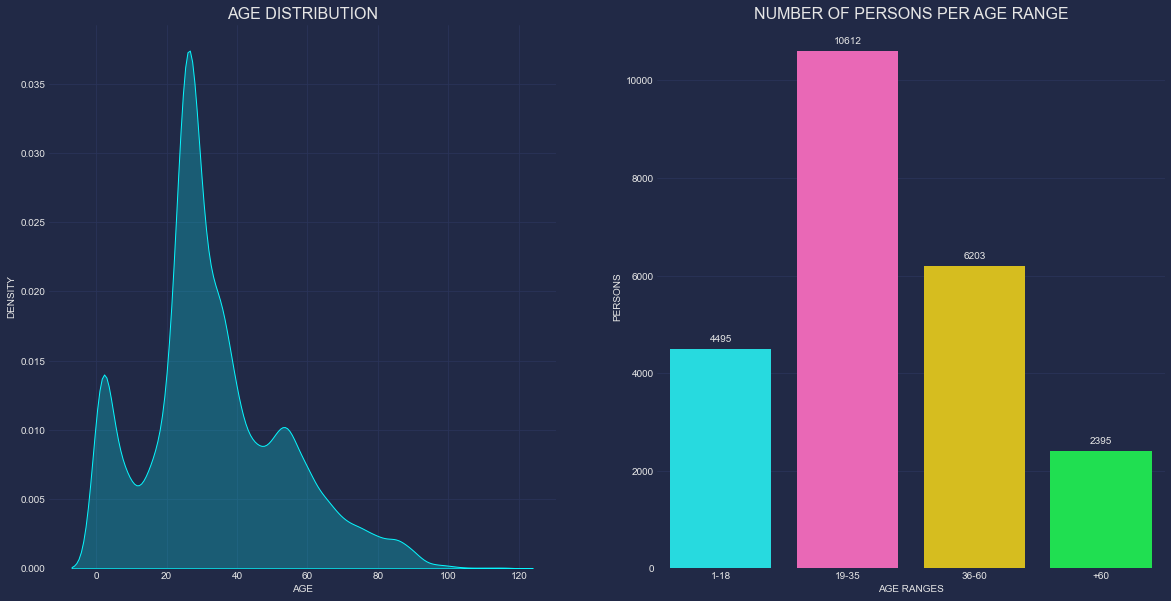

In [4]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].set_title('AGE DISTRIBUTION', fontsize = 16)
sns.kdeplot(ax = axes[0], x = 'age', data = faces, fill = True)
axes[0].set_xlabel('AGE'), axes[0].set_ylabel('DENSITY')

axes[1].set_title('NUMBER OF PERSONS PER AGE RANGE', fontsize = 16)
sns.countplot(ax = axes[1], x = 'age_bin', data = faces, order = ['1-18', '19-35', '36-60', '+60'])
axes[1].set_xlabel('AGE RANGES'), axes[1].set_ylabel('PERSONS')

for patch in axes[1].patches:
    axes[1].annotate(format(patch.get_height(), '.0f'), (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('plots/ageAgeRange.jpg', format = 'jpg')

## VISUALISING THE AGE DISTRIBUTION OF THE PEOPLE IN THE PHOTOS

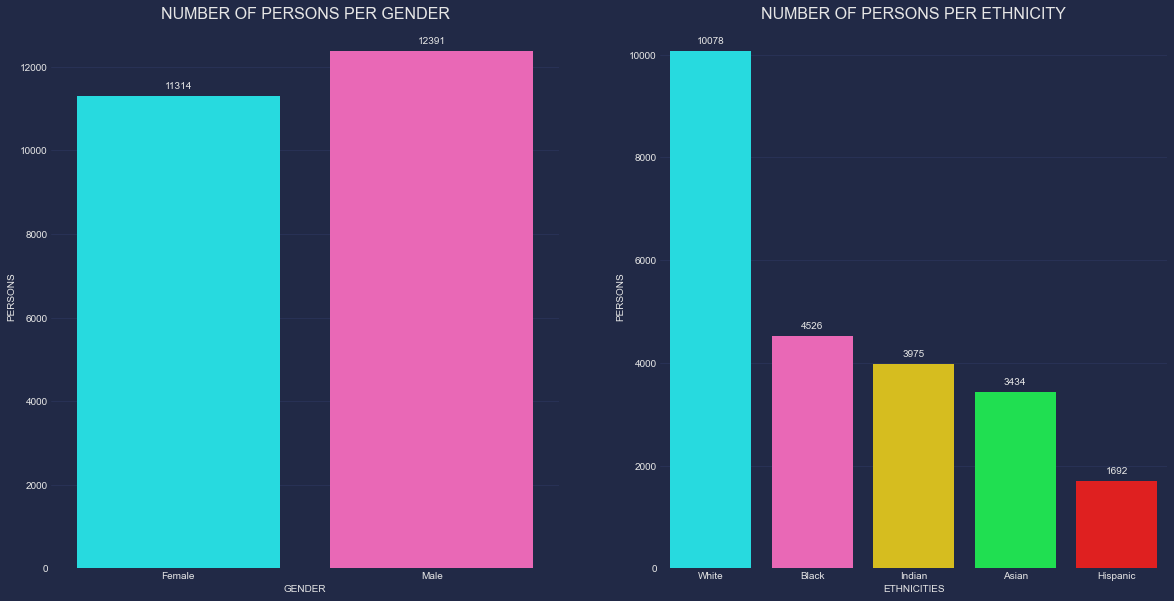

In [5]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].set_title('NUMBER OF PERSONS PER GENDER', fontsize = 16)
sns.countplot(ax = axes[0], x = 'gender', data = faces, order = ['Female', 'Male'])
axes[0].set_xlabel('GENDER'), axes[0].set_ylabel('PERSONS')

for patch in axes[0].patches:
    axes[0].annotate(format(patch.get_height(), '.0f'), (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

axes[1].set_title('NUMBER OF PERSONS PER ETHNICITY', fontsize = 16)
sns.countplot(ax = axes[1], x = 'ethnicity', data = faces, order = ['White', 'Black', 'Indian', 'Asian', 'Hispanic'])
axes[1].set_xlabel('ETHNICITIES'), axes[1].set_ylabel('PERSONS')

for patch in axes[1].patches:
    axes[1].annotate(format(patch.get_height(), '.0f'), (patch.get_x() + patch.get_width() / 2., patch.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.savefig('plots/genderEthnicity.jpg', format = 'jpg')

## GETTING THE PIXELS AVERAGE PER IMAGE

In [6]:
def pixelsAverage(pixels: str) -> int:

    formatPixels = [int(pixel) for pixel in pixels.split()]
    pixelsMean = sum(formatPixels) / len(formatPixels)
    
    return pixelsMean

faces['pixels_average'] = faces['pixels'].apply(pixelsAverage)

## STUDYING THE RELATION BETWEEN THE AVERAGE OF PIXELS PER IMAGE AND THE AGE COLUMNS

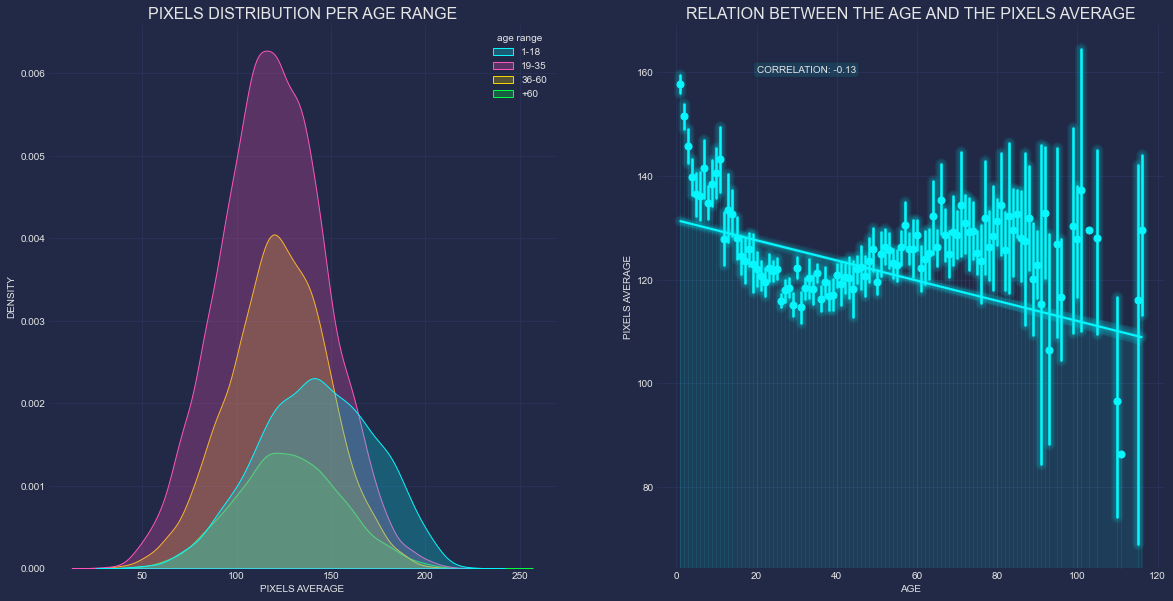

In [7]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].set_title('PIXELS DISTRIBUTION PER AGE RANGE', fontsize = 16)

sns.kdeplot(ax = axes[0], x = 'pixels_average', data = faces.rename(columns = {'age_bin': 'age range'}), 
            fill = True, hue = 'age range', hue_order = ['1-18', '19-35', '36-60', '+60'])

axes[0].set_xlabel('PIXELS AVERAGE'), axes[0].set_ylabel('DENSITY')

axes[1].set_title('RELATION BETWEEN THE AGE AND THE PIXELS AVERAGE', fontsize = 16)
sns.regplot(ax = axes[1], x = "age", y = "pixels_average", data = faces, x_estimator = np.mean)
axes[1].set_xlabel('AGE'), axes[1].set_ylabel('PIXELS AVERAGE')

axes[1].text(20, 160, f'CORRELATION: {round(faces["age"].corr(faces["pixels_average"]), 2)}', 
             bbox = dict(boxstyle = "round", alpha = 0.1))

mplcyberpunk.add_glow_effects()

plt.savefig('plots/pixelsAgeAgeRange.jpg', format = 'jpg')

## STUDYING THE RELATION BETWEEN THE AVERAGE OF PIXELS PER IMAGE AND THE ETHNICITY & GENDER COLUMNS

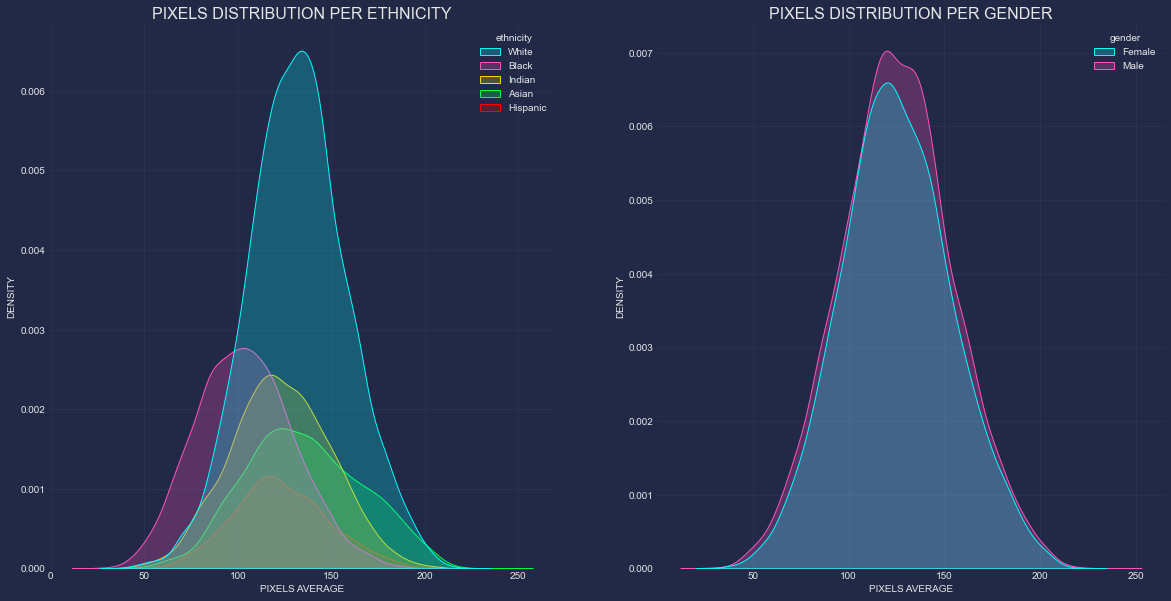

In [8]:
fig, axes = plt.subplots(1, 2, figsize = (20, 10))

axes[0].set_title('PIXELS DISTRIBUTION PER ETHNICITY', fontsize = 16)

sns.kdeplot(ax = axes[0], x = 'pixels_average', data = faces, fill = True, 
            hue = 'ethnicity', hue_order = ['White', 'Black', 'Indian', 'Asian', 'Hispanic'])

axes[0].set_xlabel('PIXELS AVERAGE'), axes[0].set_ylabel('DENSITY')

axes[1].set_title('PIXELS DISTRIBUTION PER GENDER', fontsize = 16)
sns.kdeplot(ax = axes[1], x = 'pixels_average', data = faces, fill = True, hue = 'gender', hue_order = ['Female', 'Male'])
axes[1].set_xlabel('PIXELS AVERAGE'), axes[1].set_ylabel('DENSITY')

plt.savefig('plots/pixelsEthnicityGender.jpg', format = 'jpg')